# <font color="#8333ff"> Projet 9 - Partie 2 | Classification, Clustering </font>

# Sommaire

[Chargement des données](#Chargement-des-données)<br>
[Classification hiérarchique](#Classification-hiérarchique)<br>
[KMeans](#KMeans)<br>
[Recommandations](#Recommandations)

In [1]:
import numpy as np
import pandas as pd


import seaborn as sns
import plotly.express as px
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
import plotly.offline as py
init_notebook_mode(connected=True)


import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
sns.set(font_scale = 0.9)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('max_colwidth', 400)


# Chargement des données

In [2]:
#on charge les données issues de l'ACP
df_Data_ACP = pd.read_csv('Classification_source_ACP.csv')

#on charge le dataframe comprenant les variables retenues non standardisées 
df_Datafinal_out= pd.read_csv('Datafina_out')

df_Data_ACP.head(10)

,Zone,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10
0,Arménie,-0.131482,-0.243094,-0.721597,-0.244223,0.263156,-0.806910,-0.849098,0.739169,-0.803020,0.417696
1,Afghanistan,-3.303697,-0.771362,0.225113,1.144942,0.600390,-1.499011,0.881026,-0.010938,0.819971,-0.567190
2,Albanie,0.038651,0.336102,-1.170443,0.475297,-0.645851,0.711255,-1.377350,1.720095,1.132707,1.099769
3,Algérie,-1.584300,-1.095427,-0.484071,0.821990,0.557598,-1.122728,0.151644,0.264003,0.683628,0.375481
4,Angola,-2.321143,0.404836,0.009901,0.881798,0.472775,-0.877484,0.516474,-0.353589,-0.006664,0.320636
5,Antigua-et-Barbuda,1.990992,4.326053,-0.329501,1.281053,0.694818,-0.648997,0.387907,0.373755,-1.457167,-0.970637
6,Argentine,0.345169,-0.334409,1.819912,-0.347772,-0.279252,-0.235780,0.227517,-1.324955,-0.517573,-0.394264
7,Australie,2.343564,-0.582304,1.279293,-0.181547,-2.002097,0.106092,1.154285,-1.545747,-1.076801,-0.316848
8,Autriche,2.765851,-1.411791,-1.053892,0.912663,0.079650,-0.402199,0.484332,0.123285,-0.422758,0.338109
9,Bahamas,2.753395,3.981161,0.039264,-0.818513,-0.290842,-1.008469,1.064748,0.517296,1.136068,-1.096338


In [3]:
df_Datafinal_out.head()

,Code ISO3,Groupe de pays,Zone,Log_dist,Pop_log,EvoPop,Ratio Export-Import,Exportations - Quantité (kg/hab),Importations - Quantité (kg/hab),Production (kg/hab),Variation de stock (kg/hab),Part Nourriture (%),Animal food Cost Index,Production Cost,EvoConso10,"PIB par habitant, ($ PPA internationaux constants de 2017)",Business risk,Stabilité politique et absence de violence/terrorisme (indice)
0,ARM,Asie,Arménie,8.141481,7.990152,0.386412,0.000000,0.000000,11.857393,3.726609,-0.677565,1.595771,0.9730,819.5,1.907957,12715.1,47.0,-0.44
1,AFG,Asie,Afghanistan,8.628735,10.523309,2.984051,0.087121,0.067255,0.780159,0.753257,0.000000,0.428200,0.8505,1316.0,-1.837373,2033.8,173.0,-2.76
2,ALB,Europe,Albanie,7.379632,7.966497,-0.180090,0.000000,0.000000,13.181903,4.509599,1.387569,1.297908,1.2040,2829.8,0.726132,13317.1,82.0,0.37
3,DZA,Afrique,Algérie,7.200425,10.650848,2.051651,0.000000,0.000000,0.047361,6.512204,0.000000,0.798788,0.9640,1316.0,-1.266553,11630.7,157.0,-0.84
4,AGO,Afrique,Angola,8.781095,10.335588,3.469693,0.000000,0.000000,8.990650,1.363203,0.000000,1.849549,1.0110,1316.0,-0.916974,6982.1,177.0,-0.34


In [4]:
df_Data_ACP=df_Data_ACP.set_index('Zone')

# Classification hiérarchique

In [5]:
Z = linkage(df_Data_ACP,method='ward')

In [6]:
#On indique le nombre de clusters que l'on souhaite avoir sur le dendrogramme
Nb_clusters = 180


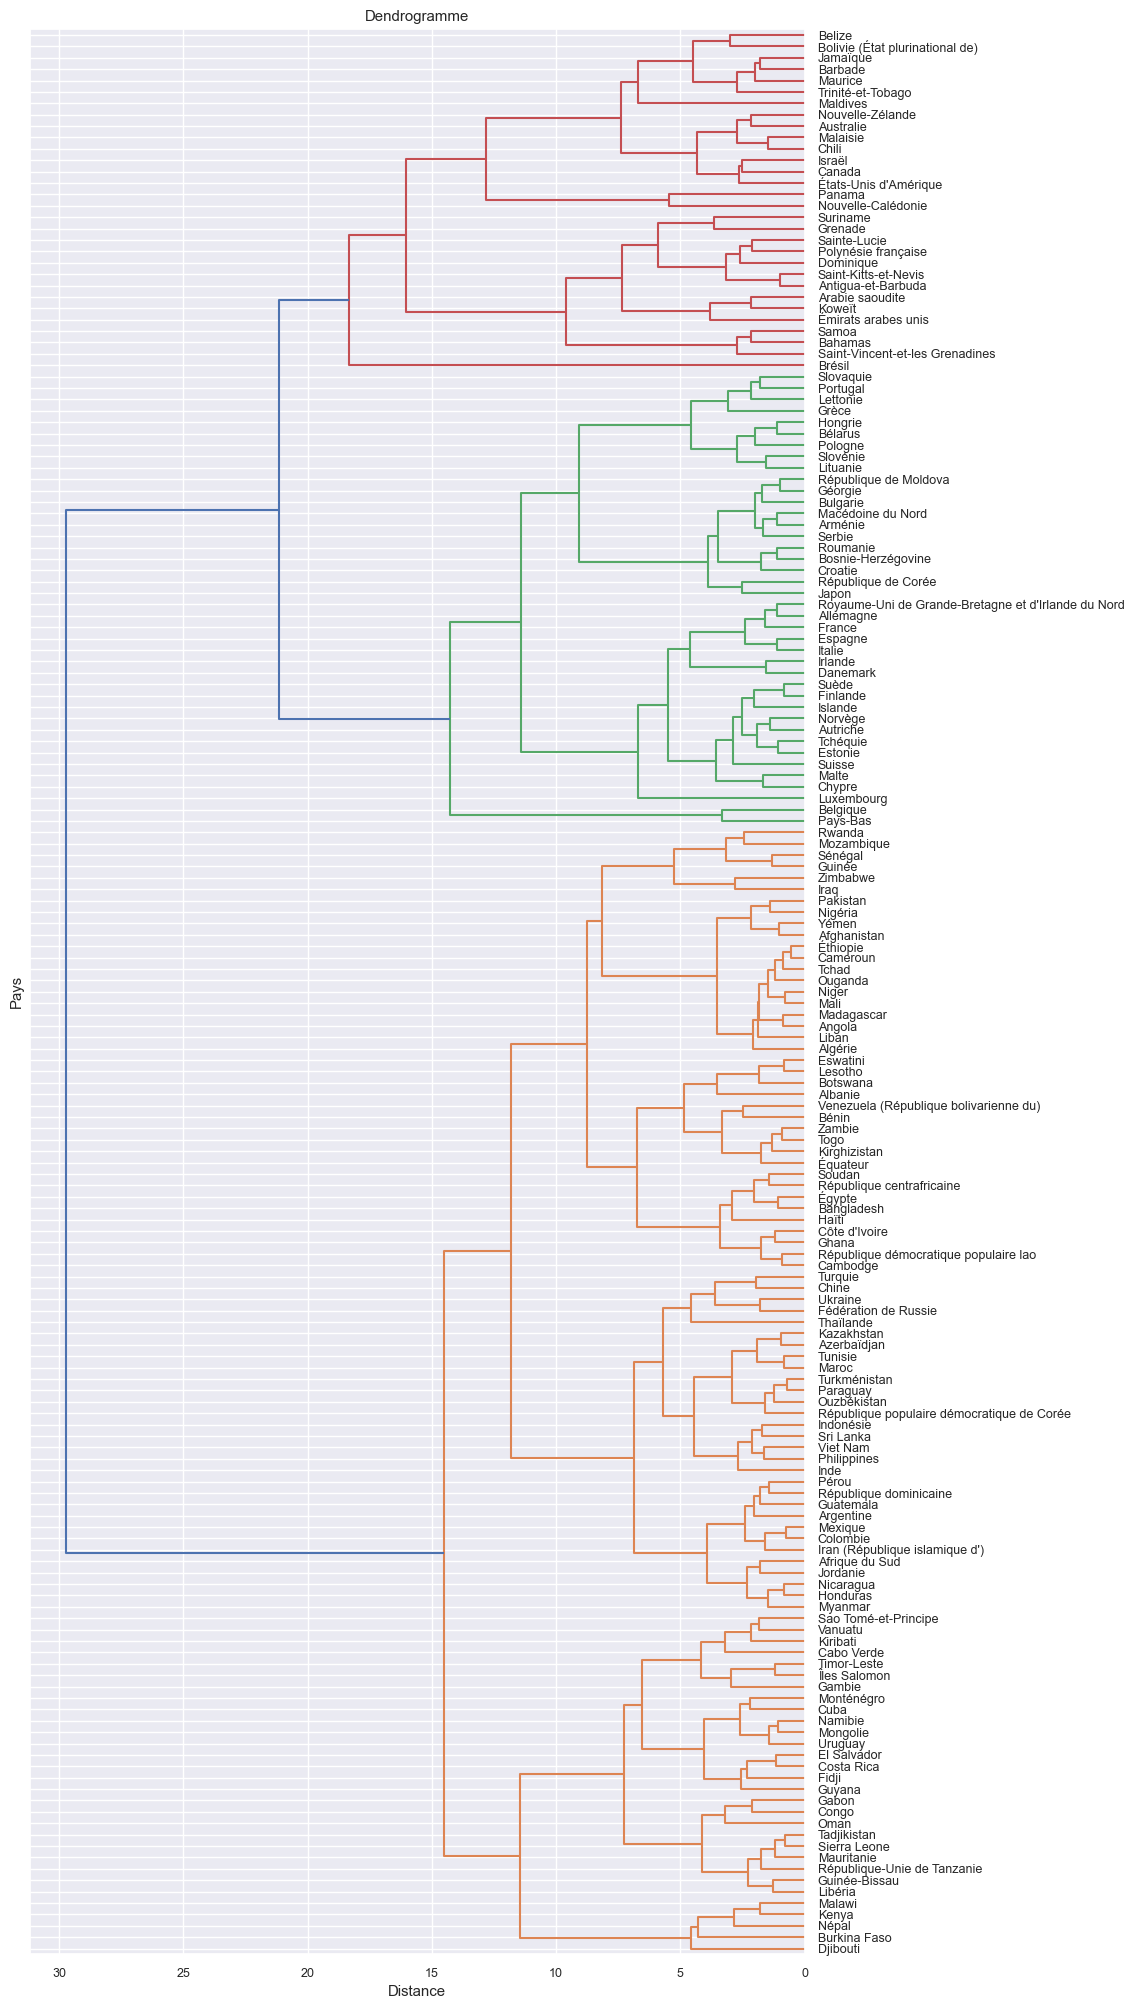

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(10,25))

_ = dendrogram(Z, ax=ax, labels=df_Data_ACP.index,orientation="left",p= Nb_clusters,truncate_mode="lastp")

plt.title("Dendrogramme")
ax.set_xlabel("Distance")
ax.set_ylabel("Pays")
ax.tick_params(axis='x', which='major', labelsize=9)
ax.tick_params(axis='y', which='major', labelsize=9)


## Analyse CAH

In [8]:
# On fixe le nombre de groupes avec la méthode du saut maximum et on liste les pays
threshold = 20
clusters_CAH = fcluster(Z, threshold, criterion='distance')
df_Data_CAH = df_Data_ACP
df_Data_CAH['GroupCAH'] = clusters_CAH

In [9]:
#On ajoute les catégories au dataframe initial
datamean = df_Datafinal_out.merge(df_Data_CAH['GroupCAH'],left_on=df_Data_CAH.index,right_on= df_Datafinal_out['Zone'])
                           
datamean.drop(columns='key_0',inplace=True)

#Dataframe contenant les valeurs moyennes des variables pour chaque catégorie
datamean.groupby('GroupCAH').mean().T

GroupCAH,1,2,3
Log_dist,8.717159,7.164610,9.010224
Pop_log,9.521906,8.903373,7.512515
EvoPop,1.855799,0.131718,1.168355
Ratio Export-Import,5.973668,1.292470,48.928656
Exportations - Quantité (kg/hab),1.041227,9.627808,4.984190
Importations - Quantité (kg/hab),4.127389,10.839191,28.349607
Production (kg/hab),10.089355,23.051830,33.068302
Variation de stock (kg/hab),0.501526,2.347144,1.985557
Part Nourriture (%),1.862925,2.365983,6.878130
Animal food Cost Index,0.921556,0.744337,0.875733


In [10]:
# On affiche les groupes obtenus par la classification
grouped = df_Data_CAH.groupby('GroupCAH')
for category, group in grouped:
    print("Group CAH:", category)
    print(group.index)
    

Group CAH: 1
Index(['Afghanistan', 'Albanie', 'Algérie', 'Angola', 'Argentine',
       'Bangladesh', 'Botswana', 'Îles Salomon', 'Myanmar', 'Cameroun',
       'Cabo Verde', 'République centrafricaine', 'Sri Lanka', 'Tchad',
       'Chine', 'Colombie', 'Congo', 'Costa Rica', 'Cuba', 'Azerbaïdjan',
       'Bénin', 'République dominicaine', 'Équateur', 'Égypte', 'El Salvador',
       'Fidji', 'Djibouti', 'Gabon', 'Gambie', 'Ghana', 'Kiribati',
       'Guatemala', 'Guinée', 'Guyana', 'Haïti', 'Honduras', 'Inde',
       'Indonésie', 'Iran (République islamique d')', 'Iraq', 'Côte d'Ivoire',
       'Kazakhstan', 'Jordanie', 'Kirghizistan', 'Kenya', 'Cambodge',
       'République populaire démocratique de Corée',
       'République démocratique populaire lao', 'Liban', 'Lesotho', 'Libéria',
       'Madagascar', 'Malawi', 'Mali', 'Mauritanie', 'Mexique', 'Mongolie',
       'Maroc', 'Mozambique', 'Namibie', 'Népal', 'Vanuatu', 'Nicaragua',
       'Niger', 'Nigéria', 'Pakistan', 'Paraguay', 'Pér

# KMeans

In [11]:
# on extrait les valeurs numériques du dataframe
kmeans_values = df_Data_ACP.iloc[:,:-1].values

In [12]:
kmeans = KMeans()

In [13]:
kmeans.fit(kmeans_values)

KMeans()

In [14]:
# on calcul le silhouette score afin de déterminer le nombre de cluster optimal
k_list = range(2, 8)
intertia=[]
silhouette=[]
for i in k_list :
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(kmeans_values) 
    intertia.append(kmeans.inertia_)
    silhouette.append(silhouette_score(kmeans_values,kmeans.labels_))

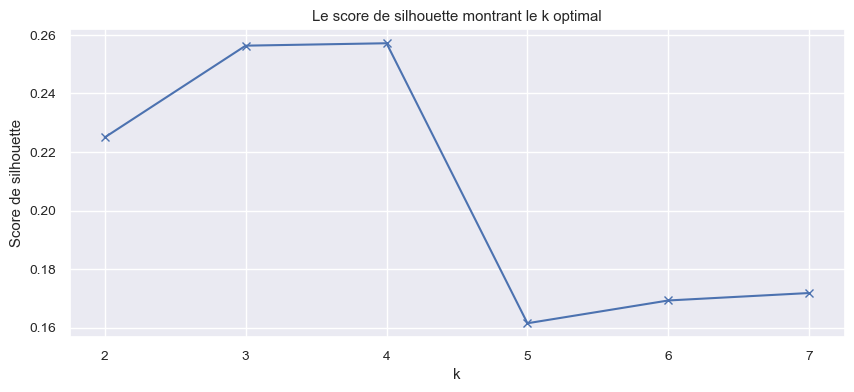

In [15]:
plt.figure(figsize=(10,4))
plt.plot(k_list, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('Score de silhouette')
plt.title('Le score de silhouette montrant le k optimal')
plt.show()


L'objectif est de déterminer le nombre de cluster pour lequel le silhouette score est le plus proche de 1. <br>On peut donc retenir k = 3 comme étant le nombre de cluster optimal

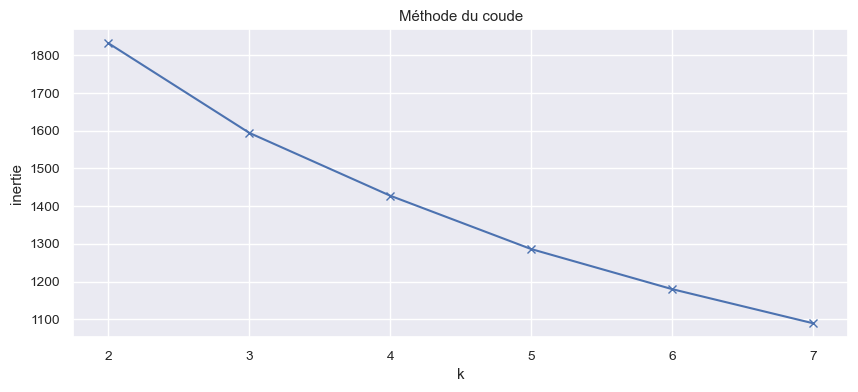

In [16]:
plt.figure(figsize=(10,4))
plt.plot(k_list, intertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertie')
plt.title('Méthode du coude')
plt.show()


La méthode du coude ne nous apporte pas plus d'information, nous restons donc sur le résultat du silhouette score

In [17]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(df_Data_ACP)

KMeans(n_clusters=3)

In [18]:
#on génère une liste de nom pour nos clusters
dd = {i:j for i,j in enumerate(list("abc"))}
dd

{0: 'a', 1: 'b', 2: 'c'}

In [19]:
labels = [dd[i] for i in kmeans.labels_]


In [20]:
kmeans.labels_

array([2, 2, 2, 2, 2, 1, 2, 0, 0, 1, 1, 2, 1, 2, 0, 1, 2, 0, 2, 2, 0, 1,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 1, 2, 0, 2, 2, 2, 0, 2, 0,
       0, 1, 2, 0, 2, 2, 0, 0, 2, 2, 0, 1, 2, 2, 2, 2, 2, 0, 0, 0, 2, 2,
       2, 2, 0, 0, 0, 2, 2, 1, 0, 2, 2, 2, 2, 2, 0, 1, 0, 2, 2, 2, 2, 0,
       2, 2, 0, 1, 2, 0, 2, 1, 2, 2, 2, 2, 0, 2, 2, 0, 1, 0, 2, 0, 2, 2,
       2, 0, 2, 1, 0, 2, 2, 2, 0, 0, 2, 2, 2, 0, 2, 0, 1, 1, 1, 2, 1, 2,
       2, 0, 0, 2, 0, 1, 2, 2, 0, 0, 2, 2, 2, 2, 1, 2, 2, 2, 0, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 0, 0, 2, 2])

In [21]:
data_kmeans = df_Data_ACP.iloc[:,:-1]
data_kmeans['Cluster_name'] = labels
data_kmeans

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,Cluster_name
Zone,,,,,,,,,,,
Arménie,-0.131482,-0.243094,-0.721597,-0.244223,0.263156,-0.806910,-0.849098,0.739169,-0.803020,0.417696,c
Afghanistan,-3.303697,-0.771362,0.225113,1.144942,0.600390,-1.499011,0.881026,-0.010938,0.819971,-0.567190,c
Albanie,0.038651,0.336102,-1.170443,0.475297,-0.645851,0.711255,-1.377350,1.720095,1.132707,1.099769,c
Algérie,-1.584300,-1.095427,-0.484071,0.821990,0.557598,-1.122728,0.151644,0.264003,0.683628,0.375481,c
Angola,-2.321143,0.404836,0.009901,0.881798,0.472775,-0.877484,0.516474,-0.353589,-0.006664,0.320636,c
Antigua-et-Barbuda,1.990992,4.326053,-0.329501,1.281053,0.694818,-0.648997,0.387907,0.373755,-1.457167,-0.970637,b
Argentine,0.345169,-0.334409,1.819912,-0.347772,-0.279252,-0.235780,0.227517,-1.324955,-0.517573,-0.394264,c
Australie,2.343564,-0.582304,1.279293,-0.181547,-2.002097,0.106092,1.154285,-1.545747,-1.076801,-0.316848,a
Autriche,2.765851,-1.411791,-1.053892,0.912663,0.079650,-0.402199,0.484332,0.123285,-0.422758,0.338109,a


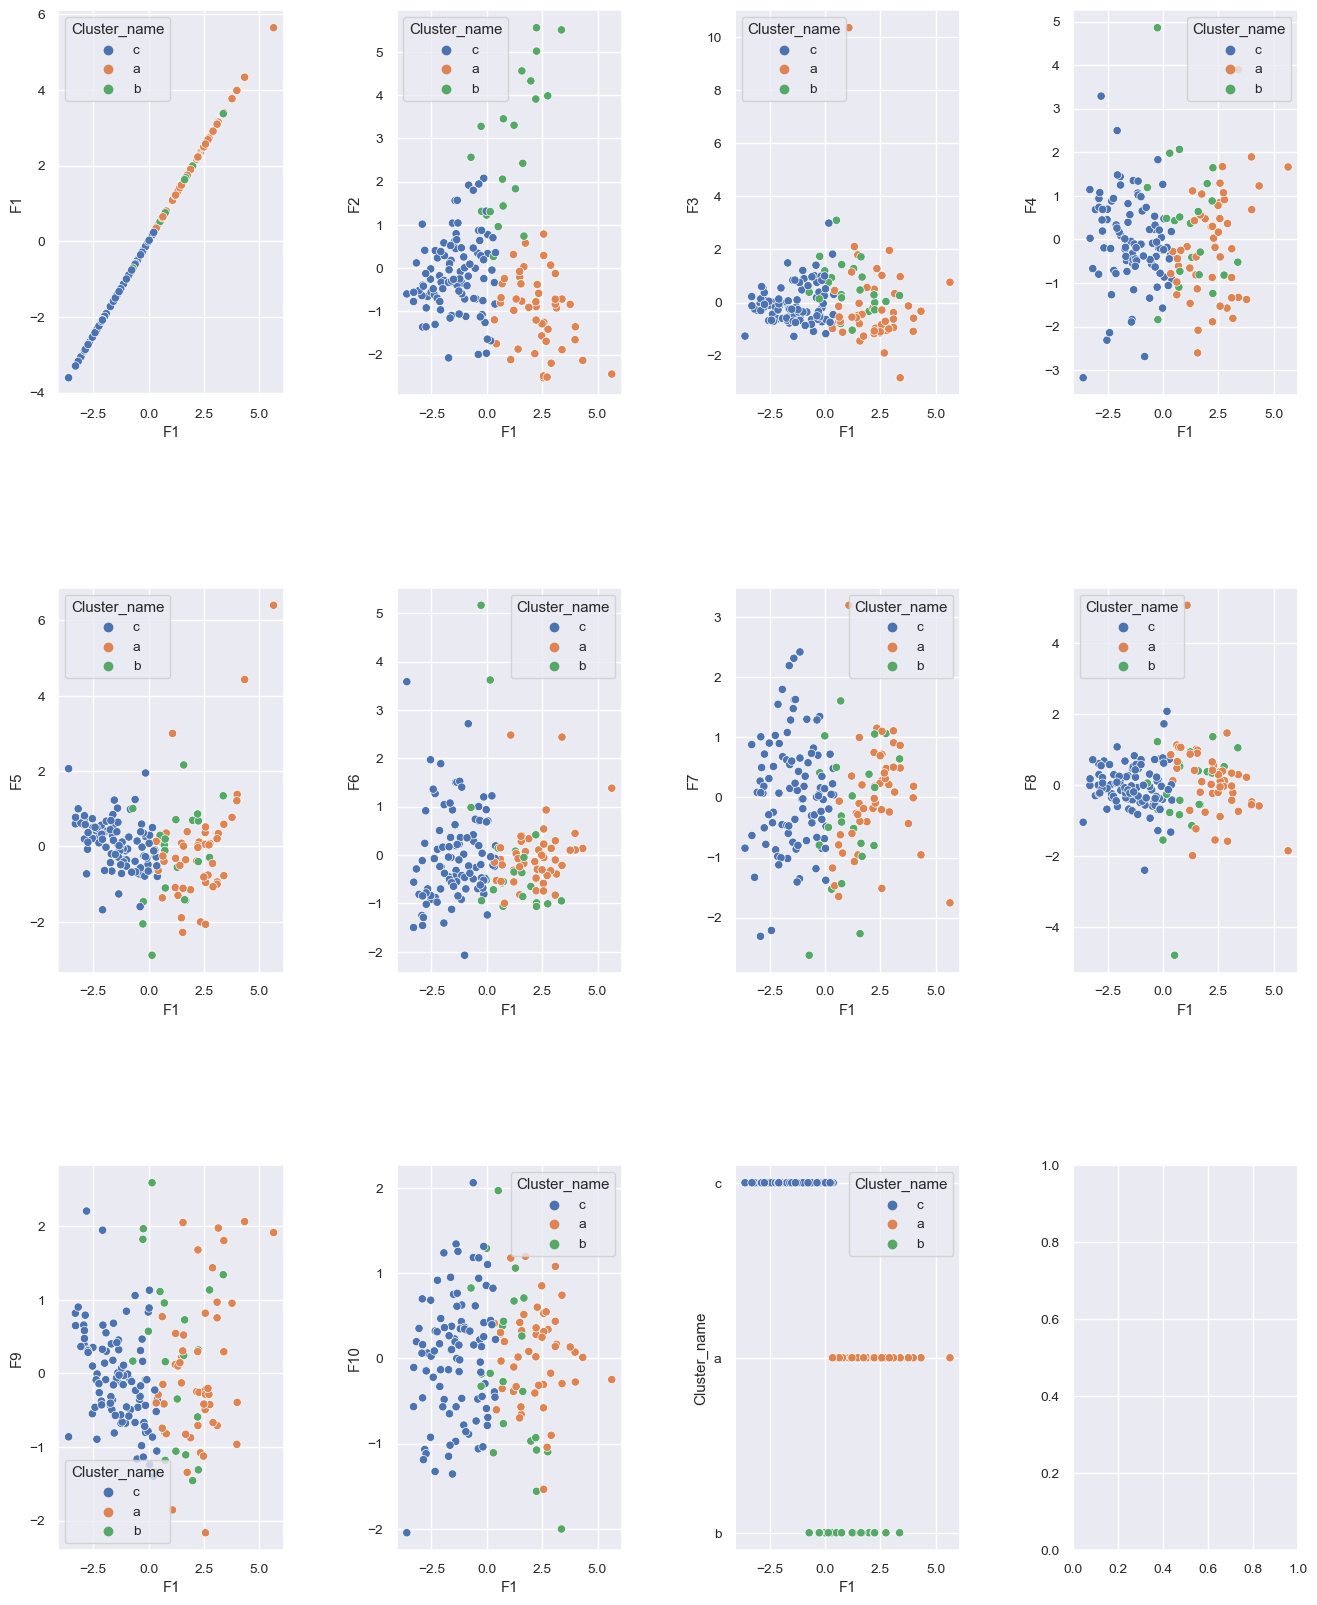

In [22]:
fig, axes = plt.subplots(3, 4, figsize=(16,20))



for ListVar , ax  in zip(data_kmeans.columns,axes.flatten()):
           
    X= data_kmeans['F1'].sort_values()
    Y= data_kmeans[ListVar]

    sns.scatterplot(data=data_kmeans ,x=X,y=Y, hue="Cluster_name",ax=ax)
    plt.subplots_adjust(wspace=.5, hspace=.5)

In [23]:
#Nous allons lister les pays dans chaque catégorie
Categ = sorted(data_kmeans['Cluster_name'].unique())

df_cluster= data_kmeans.groupby('Cluster_name')
for i in (Categ):
    print(" Groupe "+i+": ")
    print(df_cluster.get_group(i).index)


 Groupe a: 
Index(['Australie', 'Autriche', 'Brésil', 'Bulgarie', 'Canada', 'Chili',
       'Chypre', 'Danemark', 'Bélarus', 'Estonie', 'Finlande', 'France',
       'Géorgie', 'Allemagne', 'Bosnie-Herzégovine', 'Grèce', 'Hongrie',
       'Croatie', 'Islande', 'Irlande', 'Israël', 'Italie', 'Japon',
       'République de Corée', 'Lettonie', 'Lituanie', 'Malaisie', 'Malte',
       'République de Moldova', 'Pays-Bas', 'Macédoine du Nord',
       'Nouvelle-Zélande', 'Norvège', 'Tchéquie', 'Pologne', 'Portugal',
       'Roumanie', 'Fédération de Russie', 'Slovénie', 'Slovaquie', 'Espagne',
       'Suède', 'Suisse', 'Émirats arabes unis',
       'Royaume-Uni de Grande-Bretagne et d'Irlande du Nord',
       'États-Unis d'Amérique', 'Belgique', 'Luxembourg', 'Serbie'],
      dtype='object', name='Zone')
 Groupe b: 
Index(['Antigua-et-Barbuda', 'Bahamas', 'Barbade',
       'Bolivie (État plurinational de)', 'Belize', 'Cabo Verde', 'Dominique',
       'Polynésie française', 'Grenade', 'Jamaïque'

In [24]:
#On ajoute la catégorie à notre dataframe initial
data_kmeans_moy = df_Datafinal_out.merge(data_kmeans['Cluster_name'],left_on=data_kmeans.index,right_on= df_Datafinal_out['Zone'])
data_kmeans_moy.drop(columns='key_0',inplace=True)



In [25]:
#Dataframe contenant les valeurs moyennes des variables pour chaque catégorie
data_kmeans_moy.groupby('Cluster_name').mean().T


Cluster_name,a,b,c
Log_dist,7.503480,8.968267,8.723647
Pop_log,9.234598,6.327862,9.515008
EvoPop,0.307811,1.194687,1.864057
Ratio Export-Import,30.981722,0.093184,6.028542
Exportations - Quantité (kg/hab),9.100724,4.276781,0.996886
Importations - Quantité (kg/hab),9.893994,36.864173,4.049488
Production (kg/hab),28.419624,25.007592,9.900406
Variation de stock (kg/hab),2.222831,2.389114,0.424738
Part Nourriture (%),3.057437,7.110452,1.828249
Animal food Cost Index,0.739357,0.936500,0.922939


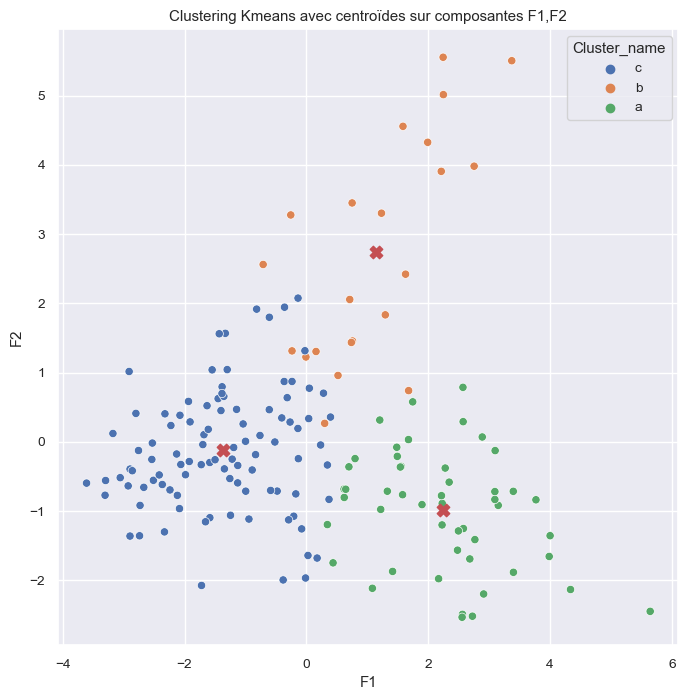

In [26]:
plt.figure(figsize=(8,8))
X= data_kmeans['F1']
Y= data_kmeans['F2']

sns.scatterplot(data=data_kmeans ,x=X,y=Y, hue="Cluster_name")
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], 
            marker="X", c="r", s=80, label="centroids")
plt.ylim = 10
plt.title('Clustering Kmeans avec centroïdes sur composantes F1,F2')
plt.show()

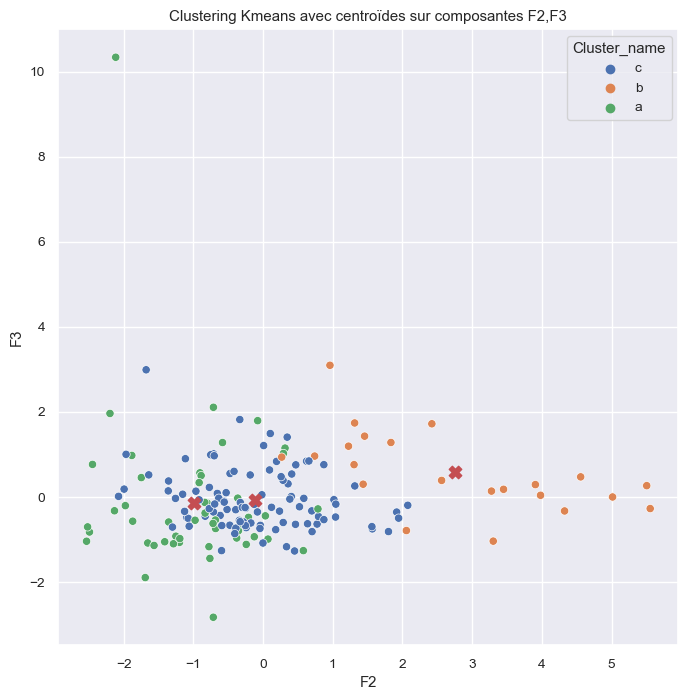

In [27]:
plt.figure(figsize=(8,8))
X= data_kmeans['F2']
Y= data_kmeans['F3']

sns.scatterplot(data=data_kmeans ,x=X,y=Y, hue="Cluster_name")
plt.scatter(kmeans.cluster_centers_[:,1], kmeans.cluster_centers_[:,2], 
            marker="X", c="r", s=80, label="centroids")
plt.title('Clustering Kmeans avec centroïdes sur composantes F2,F3')
plt.show()

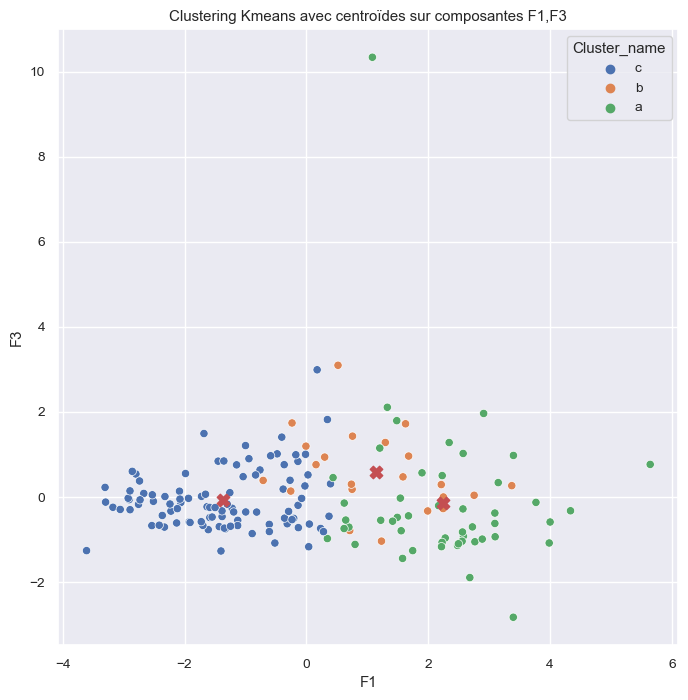

In [28]:
plt.figure(figsize=(8,8))
X= data_kmeans['F1']
Y= data_kmeans['F3']

sns.scatterplot(data=data_kmeans ,x=X,y=Y, hue="Cluster_name")
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,2], 
            marker="X", c="r", s=80, label="centroids")
plt.title('Clustering Kmeans avec centroïdes sur composantes F1,F3')
plt.show()

In [29]:
pd.DataFrame(kmeans.cluster_centers_,index=data_kmeans['Cluster_name'].unique(),columns=df_Data_ACP.columns)

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,GroupCAH
c,2.236809,-0.987020,-0.138930,-0.124920,-0.081223,-0.003881,-0.017683,0.137672,0.026672,0.039034,2.163265
b,1.135056,2.747672,0.579815,0.378741,-0.207311,-0.035244,-0.273791,-0.171921,0.179348,-0.148601,2.909091
a,-1.373213,-0.123314,-0.060697,-0.022563,0.087151,0.009852,0.070304,-0.030241,-0.053598,0.013842,1.010204


In [30]:
#coordonnées des clusters pour les plans F1,F2
kmeans.cluster_centers_[:,2]

array([-0.13893047,  0.57981532, -0.06069739])

In [31]:
fig3D = px.scatter_3d(x=data_kmeans['F1'],
                      y=data_kmeans['F2'],
                      z=data_kmeans['F3'],
                      opacity=0.7,
                      color=kmeans.labels_,
                      hover_name=data_kmeans.index,
                      hover_data={'Groupe': data_kmeans['Cluster_name']})

fig3D.update_layout(width=1000, height=800)
fig3D.update_layout(scene=dict(
    xaxis=dict(title='F1'), yaxis=dict(title='F2'), zaxis=dict(title='F3')))
fig3D.update_layout(title="Représentation 3D du Kmeans")

fig3D.show()

# Recommandations

## Analyse des différences entre les classifications

In [32]:
#Sur la base des 2 classifications on fixe les groupes suivants pour la CAH
Group3= ['Antigua-et-Barbuda', 'Australie', 'Bahamas', 'Barbade',
       'Bolivie (État plurinational de)', 'Brésil', 'Belize', 'Canada',
       'Chili', 'Dominique', 'Polynésie française', 'Grenade', 'Israël',
       'Jamaïque', 'Koweït', 'Malaisie', 'Maldives', 'Maurice',
       'Nouvelle-Calédonie', 'Nouvelle-Zélande', 'Panama',
       'Saint-Kitts-et-Nevis', 'Sainte-Lucie',
       'Saint-Vincent-et-les Grenadines', 'Arabie saoudite', 'Suriname',
       'Trinité-et-Tobago', 'Émirats arabes unis', "États-Unis d'Amérique",
       'Samoa']

Group2 =['Arménie', 'Autriche', 'Bulgarie', 'Chypre', 'Danemark', 'Bélarus',
       'Estonie', 'Finlande', 'France', 'Géorgie', 'Allemagne',
       'Bosnie-Herzégovine', 'Grèce', 'Hongrie', 'Croatie', 'Islande',
       'Irlande', 'Italie', 'Japon', 'République de Corée', 'Lettonie',
       'Lituanie', 'Malte', 'République de Moldova', 'Pays-Bas',
       'Macédoine du Nord', 'Norvège', 'Tchéquie', 'Pologne', 'Portugal',
       'Roumanie', 'Slovénie', 'Slovaquie', 'Espagne', 'Suède', 'Suisse',
       "Royaume-Uni de Grande-Bretagne et d'Irlande du Nord", 'Belgique',
       'Luxembourg', 'Serbie']

Group1 =['Afghanistan', 'Albanie', 'Algérie', 'Angola', 'Argentine',
       'Bangladesh', 'Botswana', 'Îles Salomon', 'Myanmar', 'Cameroun',
       'Cabo Verde', 'République centrafricaine', 'Sri Lanka', 'Tchad',
       'Chine', 'Colombie', 'Congo', 'Costa Rica', 'Cuba', 'Azerbaïdjan',
       'Bénin', 'République dominicaine', 'Équateur', 'Égypte', 'El Salvador',
       'Fidji', 'Djibouti', 'Gabon', 'Gambie', 'Ghana', 'Kiribati',
       'Guatemala', 'Guinée', 'Guyana', 'Haïti', 'Honduras', 'Inde',
       'Indonésie', "Iran (République islamique d')", 'Iraq', "Côte d'Ivoire",
       'Kazakhstan', 'Jordanie', 'Kirghizistan', 'Kenya', 'Cambodge',
       'République populaire démocratique de Corée',
       'République démocratique populaire lao', 'Liban', 'Lesotho', 'Libéria',
       'Madagascar', 'Malawi', 'Mali', 'Mauritanie', 'Mexique', 'Mongolie',
       'Maroc', 'Mozambique', 'Namibie', 'Népal', 'Vanuatu', 'Nicaragua',
       'Niger', 'Nigéria', 'Pakistan', 'Paraguay', 'Pérou', 'Philippines',
       'Guinée-Bissau', 'Timor-Leste', 'Zimbabwe', 'Rwanda',
       'Fédération de Russie', 'Sao Tomé-et-Principe', 'Sénégal',
       'Sierra Leone', 'Afrique du Sud', 'Tadjikistan', 'Eswatini',
       'Turkménistan', 'République-Unie de Tanzanie', 'Thaïlande', 'Togo',
       'Oman', 'Tunisie', 'Turquie', 'Ouganda', 'Ukraine', 'Burkina Faso',
       'Uruguay', 'Ouzbékistan', 'Venezuela (République bolivarienne du)',
       'Viet Nam', 'Éthiopie', 'Yémen', 'Zambie', 'Monténégro', 'Soudan']



In [33]:
Groupe_c = ['Arménie', 'Afghanistan', 'Albanie', 'Algérie', 'Angola', 'Argentine',
       'Bangladesh', 'Botswana', 'Îles Salomon', 'Myanmar', 'Cameroun',
       'République centrafricaine', 'Sri Lanka', 'Tchad', 'Chine', 'Colombie',
       'Congo', 'Costa Rica', 'Cuba', 'Azerbaïdjan', 'Bénin',
       'République dominicaine', 'Équateur', 'Égypte', 'El Salvador', 'Fidji',
       'Djibouti', 'Gabon', 'Gambie', 'Ghana', 'Kiribati', 'Guatemala',
       'Guinée', 'Guyana', 'Haïti', 'Honduras', 'Inde', 'Indonésie',
       "Iran (République islamique d')", 'Iraq', "Côte d'Ivoire", 'Kazakhstan',
       'Jordanie', 'Kirghizistan', 'Kenya', 'Cambodge',
       'République populaire démocratique de Corée',
       'République démocratique populaire lao', 'Liban', 'Lesotho', 'Libéria',
       'Madagascar', 'Malawi', 'Mali', 'Mauritanie', 'Mexique', 'Mongolie',
       'Maroc', 'Mozambique', 'Namibie', 'Népal', 'Vanuatu', 'Nicaragua',
       'Niger', 'Nigéria', 'Pakistan', 'Paraguay', 'Pérou', 'Philippines',
       'Guinée-Bissau', 'Timor-Leste', 'Zimbabwe', 'Rwanda',
       'Sao Tomé-et-Principe', 'Sénégal', 'Sierra Leone', 'Afrique du Sud',
       'Tadjikistan', 'Eswatini', 'Turkménistan',
       'République-Unie de Tanzanie', 'Thaïlande', 'Togo', 'Oman', 'Tunisie',
       'Turquie', 'Ouganda', 'Ukraine', 'Burkina Faso', 'Uruguay',
       'Ouzbékistan', 'Venezuela (République bolivarienne du)', 'Viet Nam',
       'Éthiopie', 'Yémen', 'Zambie', 'Monténégro', 'Soudan']
Groupe_b =['Australie', 'Autriche', 'Brésil', 'Bulgarie', 'Canada', 'Chili',
       'Chypre', 'Danemark', 'Bélarus', 'Estonie', 'Finlande', 'France',
       'Géorgie', 'Allemagne', 'Bosnie-Herzégovine', 'Grèce', 'Hongrie',
       'Croatie', 'Islande', 'Irlande', 'Israël', 'Italie', 'Japon',
       'République de Corée', 'Lettonie', 'Lituanie', 'Malaisie', 'Malte',
       'République de Moldova', 'Pays-Bas', 'Macédoine du Nord',
       'Nouvelle-Zélande', 'Norvège', 'Tchéquie', 'Pologne', 'Portugal',
       'Roumanie', 'Fédération de Russie', 'Slovénie', 'Slovaquie', 'Espagne',
       'Suède', 'Suisse', 'Émirats arabes unis',
       "Royaume-Uni de Grande-Bretagne et d'Irlande du Nord",
       "États-Unis d'Amérique", 'Belgique', 'Luxembourg', 'Serbie']
 
Groupe_a =['Antigua-et-Barbuda', 'Bahamas', 'Barbade',
       'Bolivie (État plurinational de)', 'Belize', 'Cabo Verde', 'Dominique',
       'Polynésie française', 'Grenade', 'Jamaïque', 'Koweït', 'Maldives',
       'Maurice', 'Nouvelle-Calédonie', 'Panama', 'Saint-Kitts-et-Nevis',
       'Sainte-Lucie', 'Saint-Vincent-et-les Grenadines', 'Arabie saoudite',
       'Suriname', 'Trinité-et-Tobago', 'Samoa']

In [34]:
#On enregistre les noms de groupe du Kmeans dans un dataframe
for i in ["a","b","c"] :
    data_kmeans.loc[data_kmeans.index.isin(["Groupe_"+i]),'Cluster_name']=i


In [35]:
data_kmeans

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,Cluster_name
Zone,,,,,,,,,,,
Arménie,-0.131482,-0.243094,-0.721597,-0.244223,0.263156,-0.806910,-0.849098,0.739169,-0.803020,0.417696,c
Afghanistan,-3.303697,-0.771362,0.225113,1.144942,0.600390,-1.499011,0.881026,-0.010938,0.819971,-0.567190,c
Albanie,0.038651,0.336102,-1.170443,0.475297,-0.645851,0.711255,-1.377350,1.720095,1.132707,1.099769,c
Algérie,-1.584300,-1.095427,-0.484071,0.821990,0.557598,-1.122728,0.151644,0.264003,0.683628,0.375481,c
Angola,-2.321143,0.404836,0.009901,0.881798,0.472775,-0.877484,0.516474,-0.353589,-0.006664,0.320636,c
Antigua-et-Barbuda,1.990992,4.326053,-0.329501,1.281053,0.694818,-0.648997,0.387907,0.373755,-1.457167,-0.970637,b
Argentine,0.345169,-0.334409,1.819912,-0.347772,-0.279252,-0.235780,0.227517,-1.324955,-0.517573,-0.394264,c
Australie,2.343564,-0.582304,1.279293,-0.181547,-2.002097,0.106092,1.154285,-1.545747,-1.076801,-0.316848,a
Autriche,2.765851,-1.411791,-1.053892,0.912663,0.079650,-0.402199,0.484332,0.123285,-0.422758,0.338109,a


In [45]:
#On compare les 2 classifications Kmeans et CAH
for i, j in zip(["a", "b", "c"], [2, 3, 1]):
    List_CAH_j = grouped.get_group(j).index.values
    List_Kmean_i = df_cluster.get_group(i).index.values
    CAHj_vs_i = [x for x in List_CAH_j if x not in List_Kmean_i]

    i_vs_CAHj = [x for x in List_Kmean_i if x not in List_CAH_j]

    print(
        str(CAHj_vs_i) + " non listé(s) dans le groupe " + str(i) +
        " du Kmeans  \n et " + str(i_vs_CAHj) +
        " non listé(s) dans le groupe " + str(j) + " de la CAH\n")

['Arménie'] non listé(s) dans le groupe a du Kmeans  
 et ['Australie', 'Brésil', 'Canada', 'Chili', 'Israël', 'Malaisie', 'Nouvelle-Zélande', 'Fédération de Russie', 'Émirats arabes unis', "États-Unis d'Amérique"] non listé(s) dans le groupe 2 de la CAH

['Australie', 'Brésil', 'Canada', 'Chili', 'Israël', 'Malaisie', 'Nouvelle-Zélande', 'Émirats arabes unis', "États-Unis d'Amérique"] non listé(s) dans le groupe b du Kmeans  
 et ['Cabo Verde'] non listé(s) dans le groupe 3 de la CAH

['Cabo Verde', 'Fédération de Russie'] non listé(s) dans le groupe c du Kmeans  
 et ['Arménie'] non listé(s) dans le groupe 1 de la CAH



In [37]:
Decile2pol=df_Datafinal_out['Stabilité politique et absence de violence/terrorisme (indice)'].quantile(0.2)
Decile2Business = df_Datafinal_out['Business risk'].quantile(0.2)


In [38]:
#Nous filtrons les pays qui ont un score de stabilité politique supérieur au 2e décile
# et un score "business" inférieur au 8e décile et une évolutuion de la consomation >0
DataPreco = df_Datafinal_out[(df_Datafinal_out[
    'Stabilité politique et absence de violence/terrorisme (indice)'] >
                           Decile2pol)
                          & (df_Datafinal_out['Business risk'] < Decile2Business)
                          & (df_Datafinal_out['EvoConso10'] > 0)]
DataPreco.shape

(28, 18)

In [39]:
DataPreco[DataPreco['Zone'].isin(Group3)].sort_values(['Importations - Quantité (kg/hab)'],ascending=False)

,Code ISO3,Groupe de pays,Zone,Log_dist,Pop_log,EvoPop,Ratio Export-Import,Exportations - Quantité (kg/hab),Importations - Quantité (kg/hab),Production (kg/hab),Variation de stock (kg/hab),Part Nourriture (%),Animal food Cost Index,Production Cost,EvoConso10,"PIB par habitant, ($ PPA internationaux constants de 2017)",Business risk,Stabilité politique et absence de violence/terrorisme (indice)
150,ARE,Asie,Émirats arabes unis,8.565793,9.172738,0.874027,0.217090,9.760191,44.959178,4.983927,-2.699627,6.925614,0.856,1316.0,5.961876,66968.2,16.0,0.70
20,CAN,Amérique septentrionale,Canada,8.700181,10.520686,1.001884,0.895604,4.396546,4.909026,38.220276,0.080918,4.223584,0.766,1605.2,1.025442,48962.5,23.0,0.98
90,MYS,Asie,Malaisie,9.253017,10.358632,1.363085,0.647059,1.395583,2.156811,54.681496,4.059879,7.279039,0.830,1313.5,2.285239,27577.4,12.0,0.25
95,MUS,Afrique,Maurice,9.150803,7.144553,0.181298,0.000000,0.000000,1.578302,37.879236,0.000000,7.006687,0.876,1316.0,0.610100,22208.1,13.0,0.87
7,AUS,Océanie,Australie,9.739497,10.122549,1.401166,2.625000,1.686872,0.642618,50.967638,2.851617,5.254916,0.458,1316.0,0.505772,49029.1,14.0,0.99
154,USA,Amérique septentrionale,États-Unis d'Amérique,8.672144,12.698010,0.681015,30.016260,11.287197,0.376036,66.995568,0.244576,5.622084,0.557,1250.0,1.456269,61339.8,6.0,0.42
107,NZL,Océanie,Nouvelle-Zélande,9.865941,8.464453,0.999235,23.000000,4.849118,0.210831,47.015358,6.746598,4.719400,0.739,1264.8,1.499905,42862.1,1.0,1.53


In [40]:
DataPreco[DataPreco['Zone'].isin(Group2)].sort_values(['Importations - Quantité (kg/hab)'],ascending=False)

,Code ISO3,Groupe de pays,Zone,Log_dist,Pop_log,EvoPop,Ratio Export-Import,Exportations - Quantité (kg/hab),Importations - Quantité (kg/hab),Production (kg/hab),Variation de stock (kg/hab),Part Nourriture (%),Animal food Cost Index,Production Cost,EvoConso10,"PIB par habitant, ($ PPA internationaux constants de 2017)",Business risk,Stabilité politique et absence de violence/terrorisme (indice)
34,DNK,Europe,Danemark,6.934397,8.657325,0.415169,1.045113,24.164978,23.121886,30.075836,0.000000,3.012349,0.4980,976.6,1.851784,56178.8,4.0,0.95
82,LVA,Europe,Lettonie,7.440734,7.564477,-1.165684,0.465116,10.370975,22.297596,17.112109,8.296780,2.222813,0.7940,1447.9,2.132054,30050.7,19.0,0.41
68,IRL,Europe,Irlande,6.656727,8.480257,0.748268,0.939394,19.299851,20.545003,22.827781,-2.490303,2.632223,0.5230,1316.0,1.012217,83726.4,24.0,1.02
105,MKD,Europe,Macédoine du Nord,7.421776,7.641544,0.069615,0.025000,0.480087,19.203469,0.960173,0.000000,2.228799,0.9490,713.0,1.698447,16145.5,17.0,-0.21
41,EST,Europe,Estonie,7.527794,7.187597,-0.002783,0.523810,8.314940,15.873976,15.118072,1.511807,2.059100,0.7520,1212.0,0.138469,35097.7,18.0,0.59
87,LTU,Europe,Lituanie,7.438384,7.937826,-1.383817,1.545455,24.274756,15.707195,42.123841,4.283780,2.629394,0.7020,987.6,3.749655,35446.7,11.0,0.74
47,GEO,Asie,Géorgie,8.123558,8.294785,-0.252382,0.098039,1.249081,12.740629,5.495958,1.498898,2.515485,0.8505,1316.0,4.035624,14253.4,7.0,-0.44
152,GBR,Europe,Royaume-Uni de Grande-Bretagne et d'Irlande du Nord,5.834811,11.114560,0.664661,0.460847,5.346902,11.602330,27.017493,0.000000,3.533342,0.4940,1316.0,1.354180,46853.2,8.0,0.08
50,DEU,Europe,Allemagne,6.084499,11.328094,0.438146,0.767221,7.771483,10.129394,18.213661,-0.348875,2.064162,0.6660,1020.3,0.565175,53486.8,22.0,0.59
133,SVN,Europe,Slovénie,6.872128,7.639083,0.161464,1.450000,13.956821,9.625394,34.651419,5.293967,2.659389,0.6980,1177.1,2.257499,37984.1,37.0,0.90


In [41]:
DataPreco[DataPreco['Zone'].isin(Group1)].sort_values(['Importations - Quantité (kg/hab)'],ascending=False)

,Code ISO3,Groupe de pays,Zone,Log_dist,Pop_log,EvoPop,Ratio Export-Import,Exportations - Quantité (kg/hab),Importations - Quantité (kg/hab),Production (kg/hab),Variation de stock (kg/hab),Part Nourriture (%),Animal food Cost Index,Production Cost,EvoConso10,"PIB par habitant, ($ PPA internationaux constants de 2017)",Business risk,Stabilité politique et absence de violence/terrorisme (indice)
72,KAZ,Asie,Kazakhstan,8.623533,9.815728,1.502629,0.034483,0.327518,9.498015,9.334256,0.436690,1.943080,0.672,1316.0,2.923826,25544.30,25.0,-0.05
32,AZE,Asie,Azerbaïdjan,8.247220,9.205281,1.195719,0.000000,0.000000,2.713694,10.452748,0.201014,1.655157,0.729,1316.0,5.175950,14209.60,28.0,-0.71
125,RUS,Europe,Fédération de Russie,7.821643,11.889539,0.200413,0.508850,0.789109,1.550770,30.493906,-0.006862,3.492278,0.980,1130.5,3.384554,26656.40,29.0,-0.54
26,CHN,Asie,Chine,9.014934,14.171539,0.516353,1.274336,0.403461,0.316605,12.773459,-0.035023,1.273076,0.672,2505.4,2.254503,13386.05,32.0,-0.02


In [42]:
datamean['GroupCAH'] = 'CAH'+ datamean['GroupCAH'].astype(str)
fig2 = px.choropleth(datamean,
                    locations='Code ISO3',
                    color='GroupCAH',
                    scope="world",
                    hover_name='Zone',
                    color_discrete_sequence=['#55A868','#4C72B0','#DD8452'])
fig2.update_layout(width=1000, height=600)
fig2.update_layout(title="Groupes de pays selon la classification ascendante hierarchique")
fig2.show()

In [43]:

custom_colors=['#4C72B0','#DD8452','#55A868']

fig = px.choropleth(data_kmeans_moy,
                    locations='Code ISO3',
                    color='Cluster_name',
                    scope="world",
                    hover_name='Zone',
                    color_discrete_sequence=custom_colors)
fig.update_layout(width=1000, height=600)
fig.update_layout(title="Groupes de pays selon la classification du K-means")

fig.show()